# Classification Models

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Decision Tree

In [2]:
# load dataset
purchase = pd.read_csv('/content/drive/MyDrive/DQlab/Machine Learning & AI - Batch 15/Day 6 - Classification and Metrics/classification_data.csv')
purchase.head()

,age,salary,purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
# sanity checks nilai unik dari kolom purchased
purchase['purchased'].unique()

array([0, 1])

In [4]:
# split data
from sklearn.model_selection import train_test_split

feature = purchase.drop(columns='purchased')
target = purchase[['purchased']]

feature_purchase_train, feature_purchase_test, target_purchase_train, target_purchase_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [5]:
# multicollinearity check
# calculate vif score for each feature column
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_purchase_train)

vif_df = (pd.DataFrame(
            [vif(X.values, i) for i in range(len(X.columns))]
            ,index=X.columns)
            .reset_index())

vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,age,1.020623
2,salary,1.020623


Aman sekali dari multicollinearity!

In [6]:
# convert data into numpy arrays
X_purchase_train = feature_purchase_train.to_numpy()
y_purchase_train = target_purchase_train.to_numpy().ravel()

In [7]:
from sklearn.tree import DecisionTreeClassifier

# define the model
dectree = DecisionTreeClassifier()

# train the model
dectree.fit(X_purchase_train, y_purchase_train)

DecisionTreeClassifier()

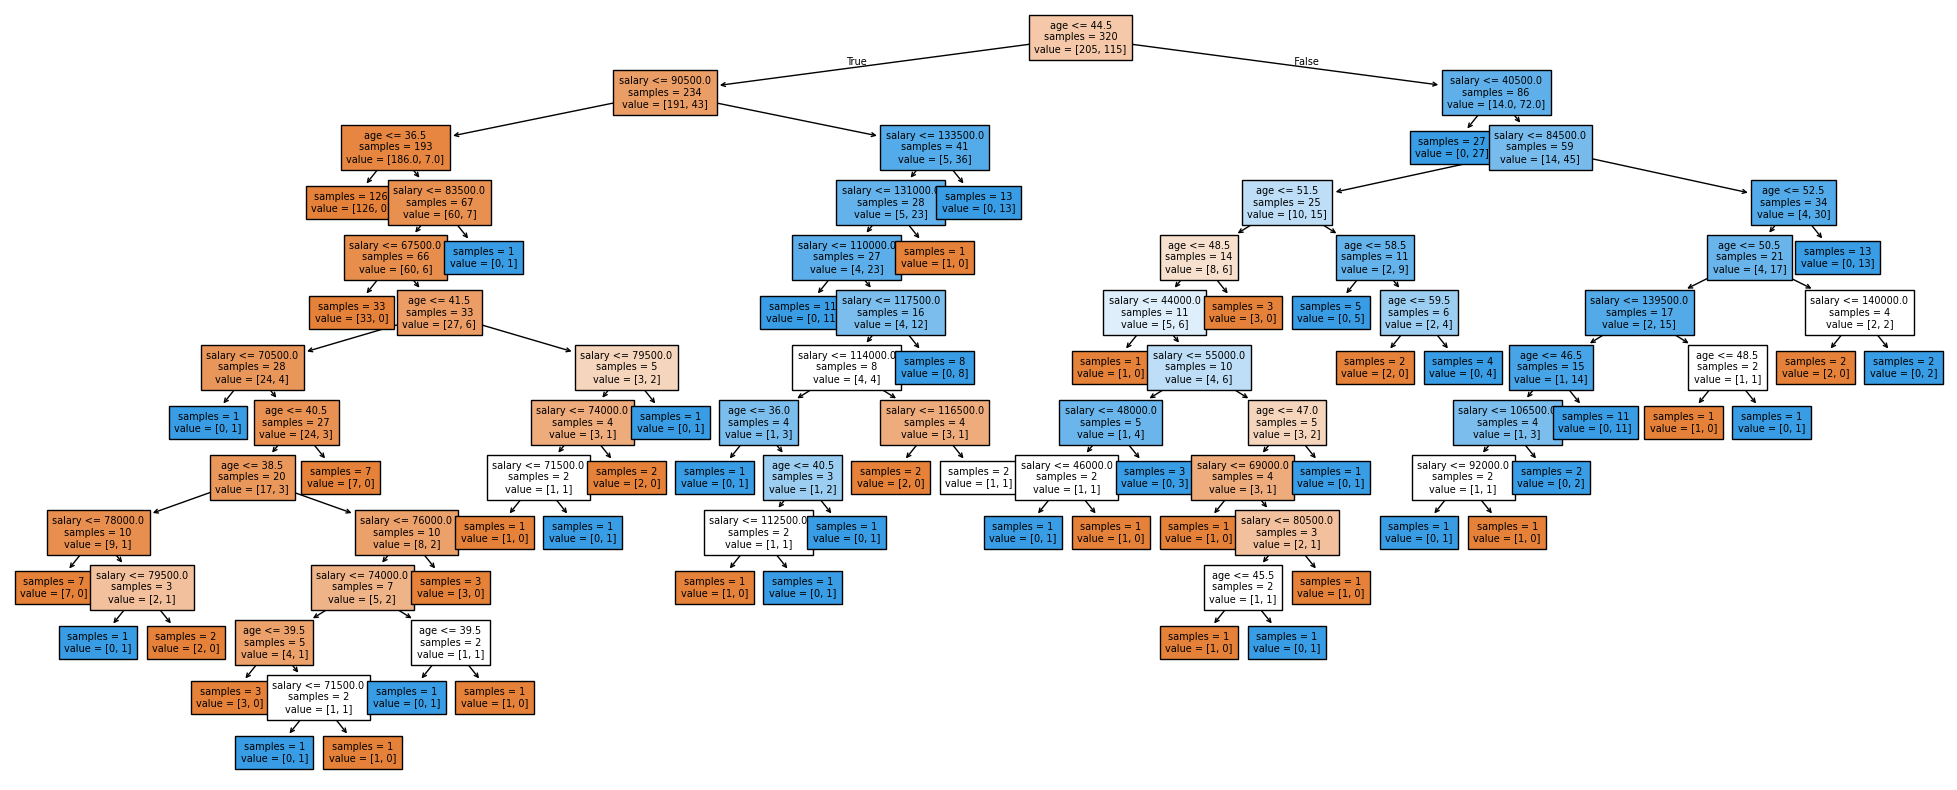

In [8]:
# menggambar decision tree yang didapat
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 10))
plot_tree(
    dectree,
    feature_names=['age',"salary"],
    impurity=False,
    filled=True,
    fontsize=7
)
plt.show()

In [9]:
# decision rules dalam bentuk tertulis
from sklearn.tree import export_text

r = export_text(dectree, feature_names=feature_purchase_train.columns.tolist())
print(r)

|--- age <= 44.50
|   |--- salary <= 90500.00
|   |   |--- age <= 36.50
|   |   |   |--- class: 0
|   |   |--- age >  36.50
|   |   |   |--- salary <= 83500.00
|   |   |   |   |--- salary <= 67500.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- salary >  67500.00
|   |   |   |   |   |--- age <= 41.50
|   |   |   |   |   |   |--- salary <= 70500.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- salary >  70500.00
|   |   |   |   |   |   |   |--- age <= 40.50
|   |   |   |   |   |   |   |   |--- age <= 38.50
|   |   |   |   |   |   |   |   |   |--- salary <= 78000.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- salary >  78000.00
|   |   |   |   |   |   |   |   |   |   |--- salary <= 79500.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- salary >  79500.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |---

In [10]:
# accuracy score on training data
from sklearn.metrics import accuracy_score

y_predict_train = dectree.predict(X_purchase_train)

print(f"Accuracy on training data is {accuracy_score(y_purchase_train,y_predict_train)}")

Accuracy on training data is 0.996875


In [11]:
# prepare test data as numpy arrays
X_purchase_test = feature_purchase_test.to_numpy()
y_purchase_test = target_purchase_test.to_numpy().ravel()

In [12]:
# accuracy score on test data
y_predict_test = dectree.predict(X_purchase_test)

print(f"Accuracy on test data is {accuracy_score(y_purchase_test,y_predict_test)}")

Accuracy on test data is 0.8375


## Random Forest

In [13]:
# cek distribusi label
purchase['purchased'].value_counts()

,count
purchased,
0,257
1,143


Imbalance, tidak boleh pake akurasi. Di sini kita akan pakai presisi untuk memaksimalkan confidence pada prediksi puchased.

In [14]:
# train random forest model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(X_purchase_train, y_purchase_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [15]:
# classification report on training data
from sklearn.metrics import classification_report

y_predict_train = rf.predict(X_purchase_train)

print(classification_report(y_purchase_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       205
           1       1.00      0.96      0.98       115

    accuracy                           0.98       320
   macro avg       0.99      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



In [16]:
# classification report on test data
from sklearn.metrics import classification_report

y_predict_test = rf.predict(X_purchase_test)

print(classification_report(y_purchase_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        52
           1       0.80      0.86      0.83        28

    accuracy                           0.88        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.88      0.88      0.88        80



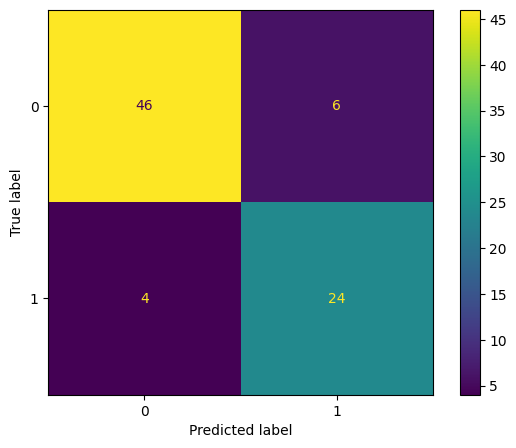

In [17]:
# plotting confusion matrix on test data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(7,5))

cm = confusion_matrix(y_purchase_test, y_predict_test,
                      labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf.classes_)
disp.plot(ax=ax)
plt.show()

## Random Forest on Telco Churn Data

In [18]:
#load data
telco = pd.read_csv('/content/drive/MyDrive/DQlab/Machine Learning & AI - Batch 15/Day 6 - Classification and Metrics/telco_processed.csv')
telco.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,log_DataQuota,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0.0,0,0,34.0,0,56.95,1889.50,0,0.930868,0,1,0,0,0,0,1
1,1,0.0,0,0,2.0,1,53.85,108.15,1,1.323844,1,0,0,0,0,0,1
2,1,0.0,0,0,45.0,0,42.30,1840.75,0,1.761515,0,1,0,1,0,0,0
3,0,0.0,0,0,2.0,1,70.70,151.65,1,0.882923,1,0,0,0,0,1,0
4,0,0.0,0,0,8.0,1,99.65,820.50,1,0.882932,1,0,0,0,0,1,0


In [19]:
# cek distribusi target
telco['Churn'].value_counts()

,count
Churn,
0,5034
1,1809


Imbalanced, tidak boleh pakai akurasi. Kita akan pakai recall untuk memaksimalkan coverage capturing potential user yang akan churn.

In [20]:
# train test split
from sklearn.model_selection import train_test_split

feature = telco.drop(columns='Churn')
target = telco[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [21]:
X_train.columns.tolist()

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'Tenure',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'log_DataQuota',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [22]:
# multicollineary handling
# calculate vif score for each column
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

cols = ['Gender',
        'SeniorCitizen',
        'Partner',
        'Dependents',
        'Tenure',
        'PaperlessBilling',
        'MonthlyCharges',
        'TotalCharges',
        'log_DataQuota']

X = add_constant(X_train[cols])

vif_df = (pd.DataFrame(
            [vif(X.values, i) for i in range(len(X.columns))]
            ,index=X.columns)
            .reset_index())

vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Gender,1.000869
2,SeniorCitizen,1.124415
3,Partner,1.452820
4,Dependents,1.366163
5,Tenure,5.919101
6,PaperlessBilling,1.172685
7,MonthlyCharges,3.545266
8,TotalCharges,9.458412
9,log_DataQuota,1.002109


TotalCharges dan Tenure memiliki VIF score yang lumayan tinggi, sehingga kita perlu lanjut dengan correlation analysis

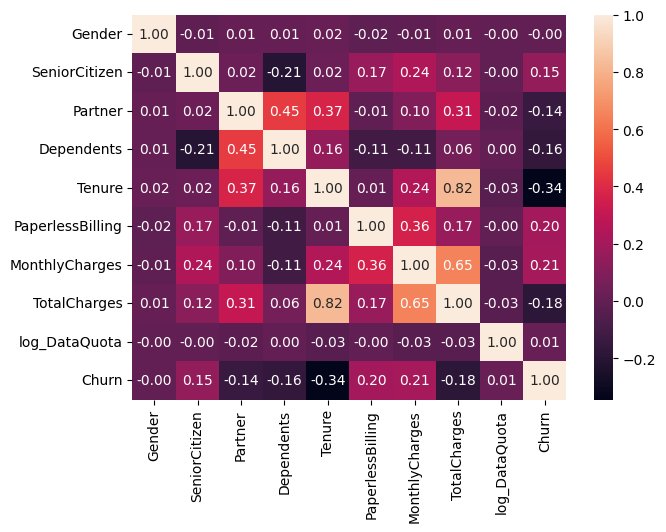

In [23]:
# heatmap correlation
train = pd.concat([X_train[cols], y_train], axis=1)
corr = train.corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Drop TotalCharges

In [24]:
# Drop TotalCharges from training and test data
X_train = X_train.drop(columns='TotalCharges')
X_test = X_test.drop(columns='TotalCharges')

In [25]:
# convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

In [26]:
# train random forest model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 25, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

In [27]:
# classification report on training data
from sklearn.metrics import classification_report

y_predict_train = rf.predict(X_train)

print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4048
           1       1.00      0.99      1.00      1426

    accuracy                           1.00      5474
   macro avg       1.00      1.00      1.00      5474
weighted avg       1.00      1.00      1.00      5474



In [28]:
# classification report on test data
from sklearn.metrics import classification_report

y_predict_test = rf.predict(X_test)

print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       986
           1       0.62      0.49      0.55       383

    accuracy                           0.77      1369
   macro avg       0.72      0.69      0.70      1369
weighted avg       0.76      0.77      0.77      1369



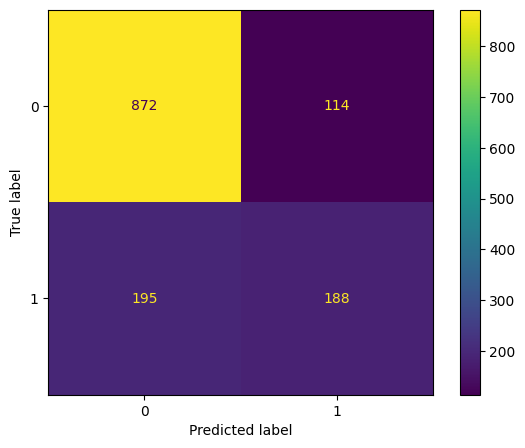

In [29]:
# plotting confusion matrix on test data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(7,5))

cm = confusion_matrix(y_test, y_predict_test, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf.classes_)
disp.plot(ax=ax)
plt.show()

# Selesai